In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage

# Numpy

In [2]:
## Creating a numpy array of size (m,n)
## Generate a 5 x 3 array of ints between 0 and 9:
a1 = np.random.randint(10, size=(5, 3))
a1

array([[2, 5, 6],
       [6, 7, 6],
       [1, 6, 1],
       [5, 6, 1],
       [5, 9, 3]])

In [3]:
## Create an empty array for place holding
a2 = np.empty([5,5])
a2

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [4]:
## Create arrays with all element having the same value
## An array with all ones
a3 = np.ones([5,5])
print(a3)

## Element-wise multiplication
a4 = a3 * 1.5
print(a4)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1.5 1.5 1.5 1.5 1.5]
 [1.5 1.5 1.5 1.5 1.5]
 [1.5 1.5 1.5 1.5 1.5]
 [1.5 1.5 1.5 1.5 1.5]
 [1.5 1.5 1.5 1.5 1.5]]


In [5]:
## Check datatype of elements in array
print(a3.dtype)

## Change datatype of elements in array
a3_copy = a3.copy().astype(np.uint8)
print(a3_copy.dtype)
print(a3_copy)

float64
uint8
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [6]:
## Create an empty array with the shape of another reference array
a5 = np.empty_like(a4)
print(a5.shape)

(5, 5)


# Numpy slicing

Text(0.5, 1.0, 'Shape of image:(512, 512, 3)')

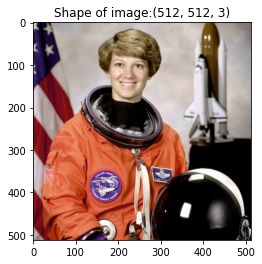

In [7]:
## Read in an sample RGB image from skimage.data, and convert it to numpy array
img_arr = np.array(skimage.data.astronaut())

## Plot the image (an numpy array)
plt.imshow(img_arr)
plt.title(f"Shape of image:{img_arr.shape}")

Shape of R channel: (512, 512)
Shape of G channel: (512, 512)
Shape of B channel: (512, 512)
Shape of grayscale image: (512, 512)


Text(0.5, 1.0, 'Shape of grayscale image:(512, 512)')

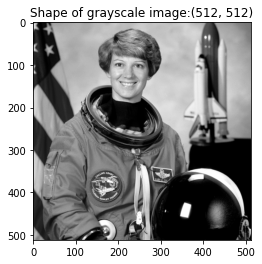

In [8]:
## Taking one channel of the RGB image
# Take each channel, Red, Green, and Blue
R, G, B = img_arr[:, :, 0], img_arr[:, :, 1], img_arr[:, :, 2]
print("Shape of R channel:", R.shape)
print("Shape of G channel:", G.shape)
print("Shape of B channel:", B.shape)


# We can convert an RGB image into a grayscale image.
# This is the equation from https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html
# We can achieve this through numpy array element-wise multiplication and addition
grayscale = 0.2125 * R + 0.7154 * G + 0.0721 * B 
print("Shape of grayscale image:", grayscale.shape)

plt.imshow(grayscale, cmap = "gray")
plt.title(f"Shape of grayscale image:{grayscale.shape}")

Text(0.5, 1.0, 'Shape of region1:(300, 200)')

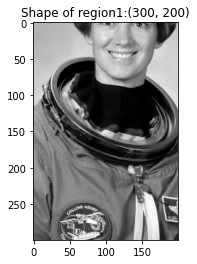

In [9]:
## Let's take an specific region of the grayscale image, using numpy array slicing

# 1. Slicing by indexing
# take the image region from row 100 to 400, and column 100 to 300
region1 = grayscale[100:400, 100:300]

plt.imshow(region1, cmap = "gray")
plt.title(f"Shape of region1:{region1.shape}")

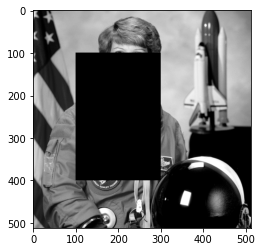

In [10]:
# 2. Replace values of the elements in an array
grayscale2 = grayscale.copy()
# Replace certain range of elements by 0
grayscale2[100:400, 100:300] = 0

plt.imshow(grayscale2, cmap = "gray")

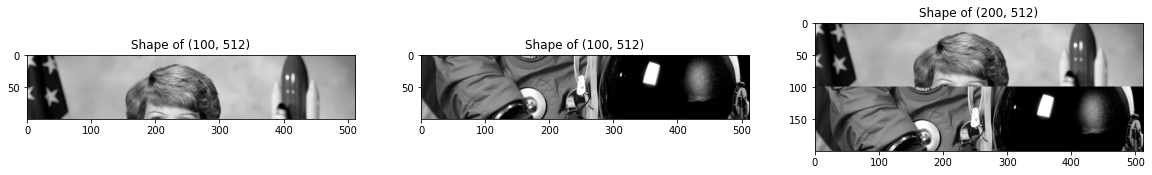

In [11]:
# 3. Combine two different regions together
row_first100 = grayscale[0:100,:]
row_last100 = grayscale[-100:,:]

# Verticle stack two arrays
verticle_stack = np.vstack([row_first100, row_last100])

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(row_first100, cmap = "gray")
plt.title(f"Shape of {row_first100.shape}")
plt.subplot(1,3,2)
plt.imshow(row_last100, cmap = "gray")
plt.title(f"Shape of {row_last100.shape}")
plt.subplot(1,3,3)
plt.imshow(verticle_stack, cmap = "gray")
plt.title(f"Shape of {verticle_stack.shape}")
plt.show()

Text(0.5, 1.0, 'Shape of (100, 1024)')

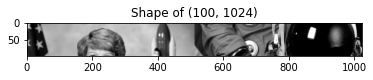

In [12]:
# horizontal stack two arrays
horizontal_stack = np.hstack([row_first100, row_last100])

plt.imshow(horizontal_stack, cmap = "gray")
plt.title(f"Shape of {horizontal_stack.shape}")


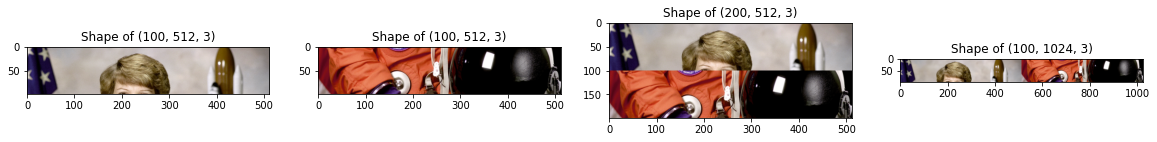

In [13]:
# For RGB image.

row_first100_rgb = img_arr[0:100,:, :]
row_last100_rgb = img_arr[-100:,:, :]

# Verticle stack two arrays
verticle_stack_rgb = np.vstack([row_first100_rgb, row_last100_rgb])
# Horizontal stack two arrays
horizontal_stack_rgb = np.hstack([row_first100_rgb, row_last100_rgb])

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.imshow(row_first100_rgb)
plt.title(f"Shape of {row_first100_rgb.shape}")
plt.subplot(1,4,2)
plt.imshow(row_last100_rgb)
plt.title(f"Shape of {row_last100_rgb.shape}")
plt.subplot(1,4,3)
plt.imshow(verticle_stack_rgb)
plt.title(f"Shape of {verticle_stack_rgb.shape}")
plt.subplot(1,4,4)
plt.imshow(horizontal_stack_rgb)
plt.title(f"Shape of {horizontal_stack_rgb.shape}")
plt.show()

Text(0.5, 1.0, 'Shape of image with noise (512, 512)')

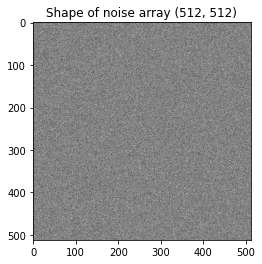

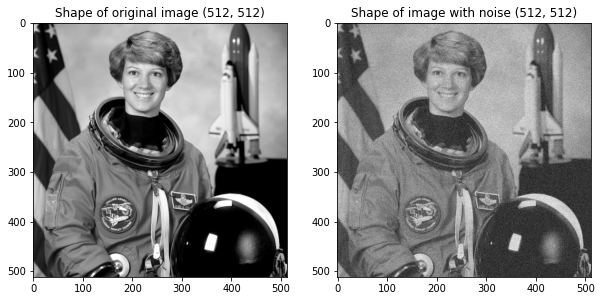

In [14]:
# Apply noise on the Grayscale image
# create an array with Gaussian distribution with mean=0, std=0.1
noise = np.random.normal(0, 20, (grayscale.shape))

plt.imshow(noise, cmap = "gray")
plt.title(f"Shape of noise array {noise.shape}")

# Add noise to the image
noisy_grayscale = grayscale + noise

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(grayscale, cmap = "gray")
ax[0].set_title(f"Shape of original image {grayscale.shape}")
ax[1].imshow(noisy_grayscale, cmap = "gray")
ax[1].set_title(f"Shape of image with noise {noisy_grayscale.shape}")

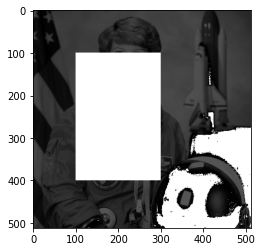

In [15]:
## use numpy.select to conditionally manipulation pixels
pixel_value_condition = [grayscale2==0, grayscale2>0] # 2 types of pixels: pixel==0, or pixel > 0
choice_list = [255, grayscale2/3] # for pixel with 0 intensity, replace 0 by 255; for pixel >0, replace pixel by pixel/3

img_arr2 = np.select(pixel_value_condition, choice_list)

plt.imshow(img_arr2, cmap="gray")


# Pandas

In [16]:
## read in csv. and create a dataframe
cancer = pd.read_csv("sample_data/cancer.csv", header=0)

In [17]:
## check the datatype of all columns
cancer.dtypes
print("original datatype:",cancer.dtypes)

## change datatype of specific columns
cancer = cancer.astype({"Id": str, "Area (mean)": int})
print("new datatype:",cancer.dtypes)

original datatype: Id                             int64
Diagnosis                     object
Radius (mean)                float64
Texture (mean)               float64
Perimeter (mean)             float64
Area (mean)                  float64
Smoothness (mean)            float64
Compactness (mean)           float64
Concavity (mean)             float64
Concave points (mean)        float64
Symmetry (mean)              float64
Fractal dimension (mean)     float64
Radius (se)                  float64
Texture (se)                 float64
Perimeter (se)               float64
Area (se)                    float64
Smoothness (se)              float64
Compactness (se)             float64
Concavity (se)               float64
Concave points (se)          float64
Symmetry (se)                float64
Fractal dimension (se)       float64
Radius (worst)               float64
Texture (worst)              float64
Perimeter (worst)            float64
Area (worst)                 float64
Smoothness (worst) 

In [18]:
## Rename columns
cancer = cancer.rename({"Radius (mean)":"cancer",
              "Texture (mean)":"Texture_mean",
              "Perimeter (mean)": "Perimeter_mean", 
              "Area (mean)": "Area_mean"}, axis=1)

## Show first few rows
cancer.head()

,Id,Diagnosis,cancer,Texture_mean,Perimeter_mean,Area_mean,Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [19]:
## Select column(s)
# Select 1 column
cancer["Diagnosis"]

# Select multiple columns
cancer[["Diagnosis", "Texture_mean", "Perimeter_mean", "cancer"]].head()

,Diagnosis,Texture_mean,Perimeter_mean,cancer
0,B,14.36,87.46,13.540
1,B,15.71,85.63,13.080
2,B,12.44,60.34,9.504
3,B,18.42,82.61,13.030
4,B,16.84,51.71,8.196


In [20]:
# Select multiple columns by index
# df.iloc[rows, cols]
print(cancer.iloc[:,0:5].head())      # select consecutive columns

print(cancer.iloc[:, [1,2,6]].head()) # select indicated columns

         Id Diagnosis  cancer  Texture_mean  Perimeter_mean
0   8510426         B  13.540         14.36           87.46
1   8510653         B  13.080         15.71           85.63
2   8510824         B   9.504         12.44           60.34
3    854941         B  13.030         18.42           82.61
4  85713702         B   8.196         16.84           51.71
  Diagnosis  cancer  Smoothness (mean)
0         B  13.540            0.09779
1         B  13.080            0.10750
2         B   9.504            0.10240
3         B  13.030            0.08983
4         B   8.196            0.08600


In [21]:
## Select row(s)
# select row 2 to row 9
cancer.iloc[2:10]

,Id,Diagnosis,cancer,Texture_mean,Perimeter_mean,Area_mean,Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
2,8510824,B,9.504,12.44,60.34,273,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
5,857155,B,12.050,14.63,78.04,449,0.10310,0.09092,0.06592,0.027490,...,13.760,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301
6,857156,B,13.490,22.30,86.91,561,0.08752,0.07698,0.04751,0.033840,...,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
7,857343,B,11.760,21.60,74.72,427,0.08637,0.04966,0.01657,0.011150,...,12.980,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
8,857373,B,13.640,16.34,87.21,571,0.07685,0.06059,0.01857,0.017230,...,14.670,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025
9,857374,B,11.940,18.24,75.71,437,0.08261,0.04751,0.01972,0.013490,...,13.100,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408


In [22]:
## Select rows and columns
print(cancer.iloc[2:7][["Diagnosis", "cancer", "Texture_mean"]])

## Equivalently
print(cancer.iloc[2:7, 1:4])

  Diagnosis  cancer  Texture_mean
2         B   9.504         12.44
3         B  13.030         18.42
4         B   8.196         16.84
5         B  12.050         14.63
6         B  13.490         22.30
  Diagnosis  cancer  Texture_mean
2         B   9.504         12.44
3         B  13.030         18.42
4         B   8.196         16.84
5         B  12.050         14.63
6         B  13.490         22.30


In [23]:
## Select every n rows
n = 100
cancer[cancer.index % n == 0]

,Id,Diagnosis,cancer,Texture_mean,Perimeter_mean,Area_mean,Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.54,14.36,87.46,566,0.09779,0.08129,0.066640,0.04781,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
100,8810436,B,15.27,12.91,98.17,725,0.08182,0.06230,0.058920,0.03157,...,17.38,15.92,113.70,932.7,0.12220,0.21860,0.29620,0.10350,0.2320,0.07474
200,901041,B,13.30,21.57,85.24,546,0.08582,0.06373,0.033440,0.02424,...,14.20,29.20,92.94,621.2,0.11400,0.16670,0.12120,0.05614,0.2637,0.06658
300,914101,B,12.46,12.83,78.83,477,0.07372,0.04043,0.007173,0.01149,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
400,857392,M,18.22,18.70,120.30,1033,0.11480,0.14850,0.177200,0.10600,...,20.60,24.13,135.10,1321.0,0.12800,0.22970,0.26230,0.13250,0.3021,0.07987
500,89122,M,19.40,18.18,127.20,1145,0.10370,0.14420,0.162600,0.09464,...,23.79,28.65,152.40,1628.0,0.15180,0.37490,0.43160,0.22520,0.3590,0.07787


In [24]:
## Exclude every n rows
n = 3
cancer[cancer.index % n != 0]

,Id,Diagnosis,cancer,Texture_mean,Perimeter_mean,Area_mean,Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
1,8510653,B,13.080,15.71,85.63,520,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.1312,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773
4,85713702,B,8.196,16.84,51.71,201,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.1297,0.13570,0.06880,0.02564,0.3105,0.07409
5,857155,B,12.050,14.63,78.04,449,0.10310,0.09092,0.06592,0.027490,...,13.760,20.70,89.88,582.6,0.1494,0.21560,0.30500,0.06548,0.2747,0.08301
7,857343,B,11.760,21.60,74.72,427,0.08637,0.04966,0.01657,0.011150,...,12.980,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,91979701,M,14.270,22.55,93.77,629,0.10380,0.11540,0.14630,0.061390,...,15.290,34.27,104.30,728.3,0.1380,0.27330,0.42340,0.13620,0.2698,0.08351
563,925622,M,15.220,30.62,103.40,716,0.10480,0.20870,0.25500,0.094290,...,17.520,42.79,128.70,915.0,0.1417,0.79170,1.17000,0.23560,0.4089,0.14090
565,926424,M,21.560,22.39,142.00,1479,0.11100,0.11590,0.24390,0.138900,...,25.450,26.40,166.10,2027.0,0.1410,0.21130,0.41070,0.22160,0.2060,0.07115
566,926682,M,20.130,28.25,131.20,1261,0.09780,0.10340,0.14400,0.097910,...,23.690,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637


In [25]:
## Select rows based on Column condition
# Select rows whose Diagnosis is 'B'
cancer[cancer["Diagnosis"] == "B"]

,Id,Diagnosis,cancer,Texture_mean,Perimeter_mean,Area_mean,Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,925277,B,14.590,22.68,96.39,657,0.08473,0.13300,0.10290,0.037360,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
353,925291,B,11.510,23.93,74.52,403,0.09261,0.10210,0.11120,0.041050,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
354,925292,B,14.050,27.15,91.38,600,0.09929,0.11260,0.04462,0.043040,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
355,925311,B,11.200,29.37,70.67,386,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [26]:
## Select rows based on multiple conditions
# select rows with "Diagnosis" is 'B' and "cancer" less than 8
cancer[(cancer["Diagnosis"] == "B") & (cancer["cancer"] < 8)]

,Id,Diagnosis,cancer,Texture_mean,Perimeter_mean,Area_mean,Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
35,862722,B,6.981,13.43,43.79,143,0.11700,0.07568,0.00000,0.00000,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00,0.2932,0.09382
332,921092,B,7.729,25.49,47.98,178,0.08098,0.04878,0.00000,0.00000,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00,0.3058,0.09938
333,921362,B,7.691,25.44,48.34,170,0.08668,0.11990,0.09252,0.01364,...,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05,0.2790,0.10660
356,92751,B,7.760,24.54,47.92,181,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00,0.2871,0.07039


In [27]:
# More complicated conditioning
cancer[(cancer["cancer"].between(11.4,12.1)) & (cancer["Diagnosis"] == "M")]

,Id,Diagnosis,cancer,Texture_mean,Perimeter_mean,Area_mean,Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
360,84348301,M,11.42,20.38,77.58,386,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.6869,0.2575,0.6638,0.17300
385,853612,M,11.84,18.70,77.93,440,0.11090,0.15160,0.12180,0.05182,...,16.82,28.12,119.40,888.7,0.1637,0.57750,0.6956,0.1546,0.4761,0.14020
439,869691,M,11.80,16.58,78.99,432,0.10910,0.17000,0.16590,0.07415,...,13.74,26.38,91.93,591.7,0.1385,0.40920,0.4504,0.1865,0.5774,0.10300
502,892189,M,11.76,18.14,75.00,431,0.09968,0.05914,0.02685,0.03515,...,13.36,23.39,85.10,553.6,0.1137,0.07974,0.0612,0.0716,0.1978,0.06915


In [28]:
## Create new column based on existing column
cancer["new_1"] = cancer["cancer"] * 100
cancer[["cancer", "new_1"]].head()

,cancer,new_1
0,13.540,1354.0
1,13.080,1308.0
2,9.504,950.4
3,13.030,1303.0
4,8.196,819.6


In [29]:
## Create new column based on existing columns
cancer["new_2"] = cancer["cancer"] + cancer["Texture_mean"] * 1000
cancer[["cancer", "Texture_mean", "new_2", ]].head()

,cancer,Texture_mean,new_2
0,13.540,14.36,14373.540
1,13.080,15.71,15723.080
2,9.504,12.44,12449.504
3,13.030,18.42,18433.030
4,8.196,16.84,16848.196


# Use Pandas with Numpy

In [30]:
## Create new column based on complex conditions
# create a list of our conditions
conditions = [
    (cancer['Texture_mean'] <= 10),
    (cancer['Texture_mean'] > 10) & (cancer['Texture_mean'] <= 12),
    (cancer['Texture_mean'] > 12) & (cancer['Texture_mean'] <= 15),
    (cancer['Texture_mean'] > 15)
    ]

# create a list of the values we want to assign for each condition
values = ['T1', 'T2', 'T3', 'T4']

# create a new column and use np.select to assign values to it using our lists as arguments
cancer['tier'] = np.select(conditions, values)

# sort the rows by ascending order
cancer[["tier", "Texture_mean"]].sort_values(by=["Texture_mean"]) ## set ascending=False for descending sorting

,tier,Texture_mean
79,T1,9.71
357,T2,10.38
165,T2,10.72
49,T2,10.82
50,T2,10.89
...,...,...
495,T4,31.12
472,T4,32.47
489,T4,33.56
113,T4,33.81


In [31]:
## Convert Pandas to Numpy
cancer_np = np.array(cancer)

print(cancer_np.shape)

(569, 35)


In [32]:
## For example, if we want to use "Diagnosis" column as the class label, and
## the rest of columns as predictors

# e.g., the target class is "Diagnosis"
target = np.array(cancer["Diagnosis"])

# The rest of columns, except "Texture_mean" and "tier" are treated as features
features= np.array(cancer.iloc[:, ~cancer.columns.isin(['Diagnosis', 'Texture_mean', "tier"])])

print("Features array shape:", features.shape)
print("Target array shape:", target.shape)

Features array shape: (569, 32)
Target array shape: (569,)
